In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [47]:
path = './WHO COVID-19 Data/WHO-COVID-19-global-table-data.csv'
df = pd.read_csv(path)
df.reset_index(inplace=True)
df = df.shift(1, axis=1)
df.drop(df.columns[0], axis=1, inplace=True)
df

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Global,NaN,771549718,9898.59161,31939,0.409761,0,6974473,89.478952,1359,0.017435,0
1,United States of America,Americas,103436829,31249.54700,0,0.000000,0,1136920,343.478000,0,0.000000,0
2,China,Western Pacific,99316932,6750.34400,284,0.019000,0,121764,8.276000,0,0.000000,0
3,India,South-East Asia,45001052,3260.93500,1372,0.099000,0,533291,38.644000,1254,0.091000,0
4,France,Europe,38997490,59959.83100,0,0.000000,0,167985,258.282000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Tokelau,Western Pacific,80,5925.92600,0,0.000000,0,0,0.000000,0,0.000000,0
234,Holy See,Europe,26,3213.84400,0,0.000000,0,0,0.000000,0,0.000000,0
235,Pitcairn Islands,Western Pacific,4,8000.00000,0,0.000000,0,0,0.000000,0,0.000000,0
236,Democratic People's Republic of Korea,South-East Asia,0,0.00000,0,0.000000,0,0,0.000000,0,0.000000,0


In [48]:
df.Name.unique()[1:]

array(['United States of America', 'China', 'India', 'France', 'Germany',
       'Brazil', 'Republic of Korea', 'Japan', 'Italy',
       'The United Kingdom', 'Russian Federation', 'Türkiye', 'Spain',
       'Viet Nam', 'Australia', 'Argentina', 'Netherlands', 'Mexico',
       'Iran (Islamic Republic of)', 'Indonesia', 'Poland', 'Colombia',
       'Austria', 'Portugal', 'Ukraine', 'Greece', 'Chile', 'Malaysia',
       'Israel', 'Belgium', 'Thailand', 'Canada', 'Czechia', 'Peru',
       'Switzerland', 'Philippines', 'South Africa', 'Romania', 'Denmark',
       'Sweden', 'Singapore', 'Serbia', 'Iraq', 'New Zealand', 'Hungary',
       'Bangladesh', 'Slovakia', 'Georgia', 'Jordan', 'Ireland',
       'Pakistan', 'Kazakhstan', 'Norway', 'Finland', 'Slovenia',
       'Lithuania', 'Bulgaria', 'Morocco', 'Croatia', 'Guatemala',
       'Puerto Rico', 'Lebanon', 'Costa Rica',
       'Bolivia (Plurinational State of)', 'Tunisia', 'Cuba', 'Ecuador',
       'United Arab Emirates', 'Panama', 'Uruguay

## Total Cumulative Cases for Each Country - Static Map

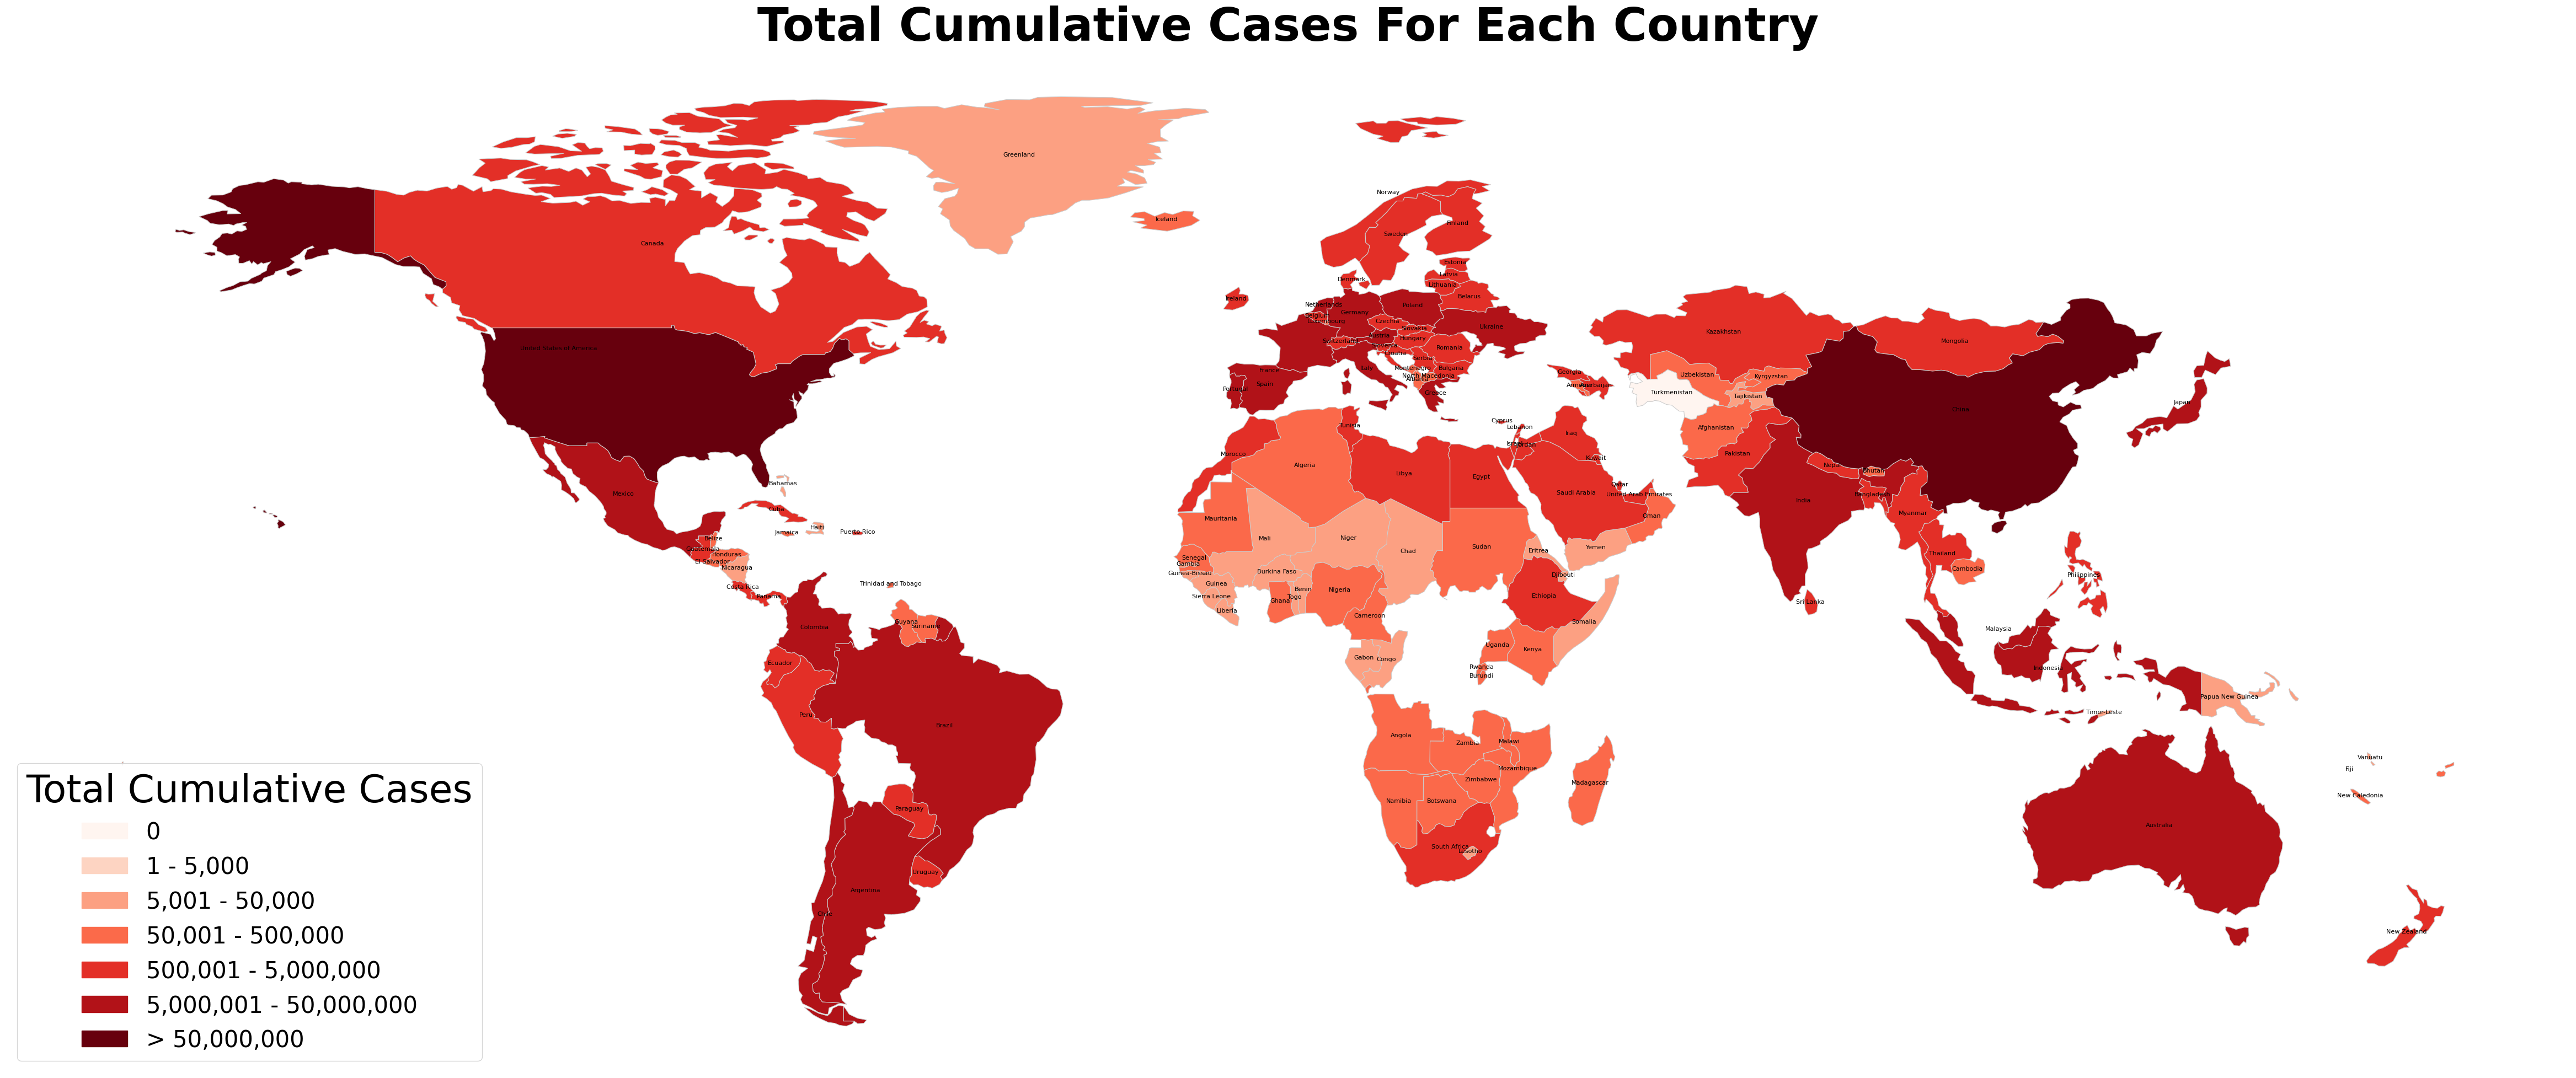

In [49]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# read in the shapefile of country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# join the data with the country boundaries
merged = world.merge(df, left_on='name', right_on='Name')

# create bins for the data
bins = [-np.inf, 0 , 5000, 50000, 500000, 5000000, 50000000, np.inf]
labels = ['0', '1 - 5,000', '5,001 - 50,000', '50,001 - 500,000', '500,001 - 5,000,000', '5,000,001 - 50,000,000', '> 50,000,000']
merged['bin'] = pd.cut(merged['Cases - cumulative total'], bins=bins, labels=labels)

# plot the data on a map
fig, ax = plt.subplots(figsize=(60, 60))
merged.plot(column='bin', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Total Cumulative Cases For Each Country', fontdict={'fontsize': '60', 'fontweight' : 'bold'})

# add country labels to the map
merged.apply(lambda x: ax.annotate(text=x.Name, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8),axis=1)

# add a legend with color blocks corresponding to different bins
cmap = plt.cm.get_cmap('Reds', len(labels))
handles = [plt.Rectangle((0,0),1,1, color=cmap(i)) for i in range(len(labels))]
ax.legend(handles, labels, loc='lower left', fontsize=30, title='Total Cumulative Cases', title_fontsize=50)

plt.show()

## Total Cumulative Deths for Each Country - Static Map

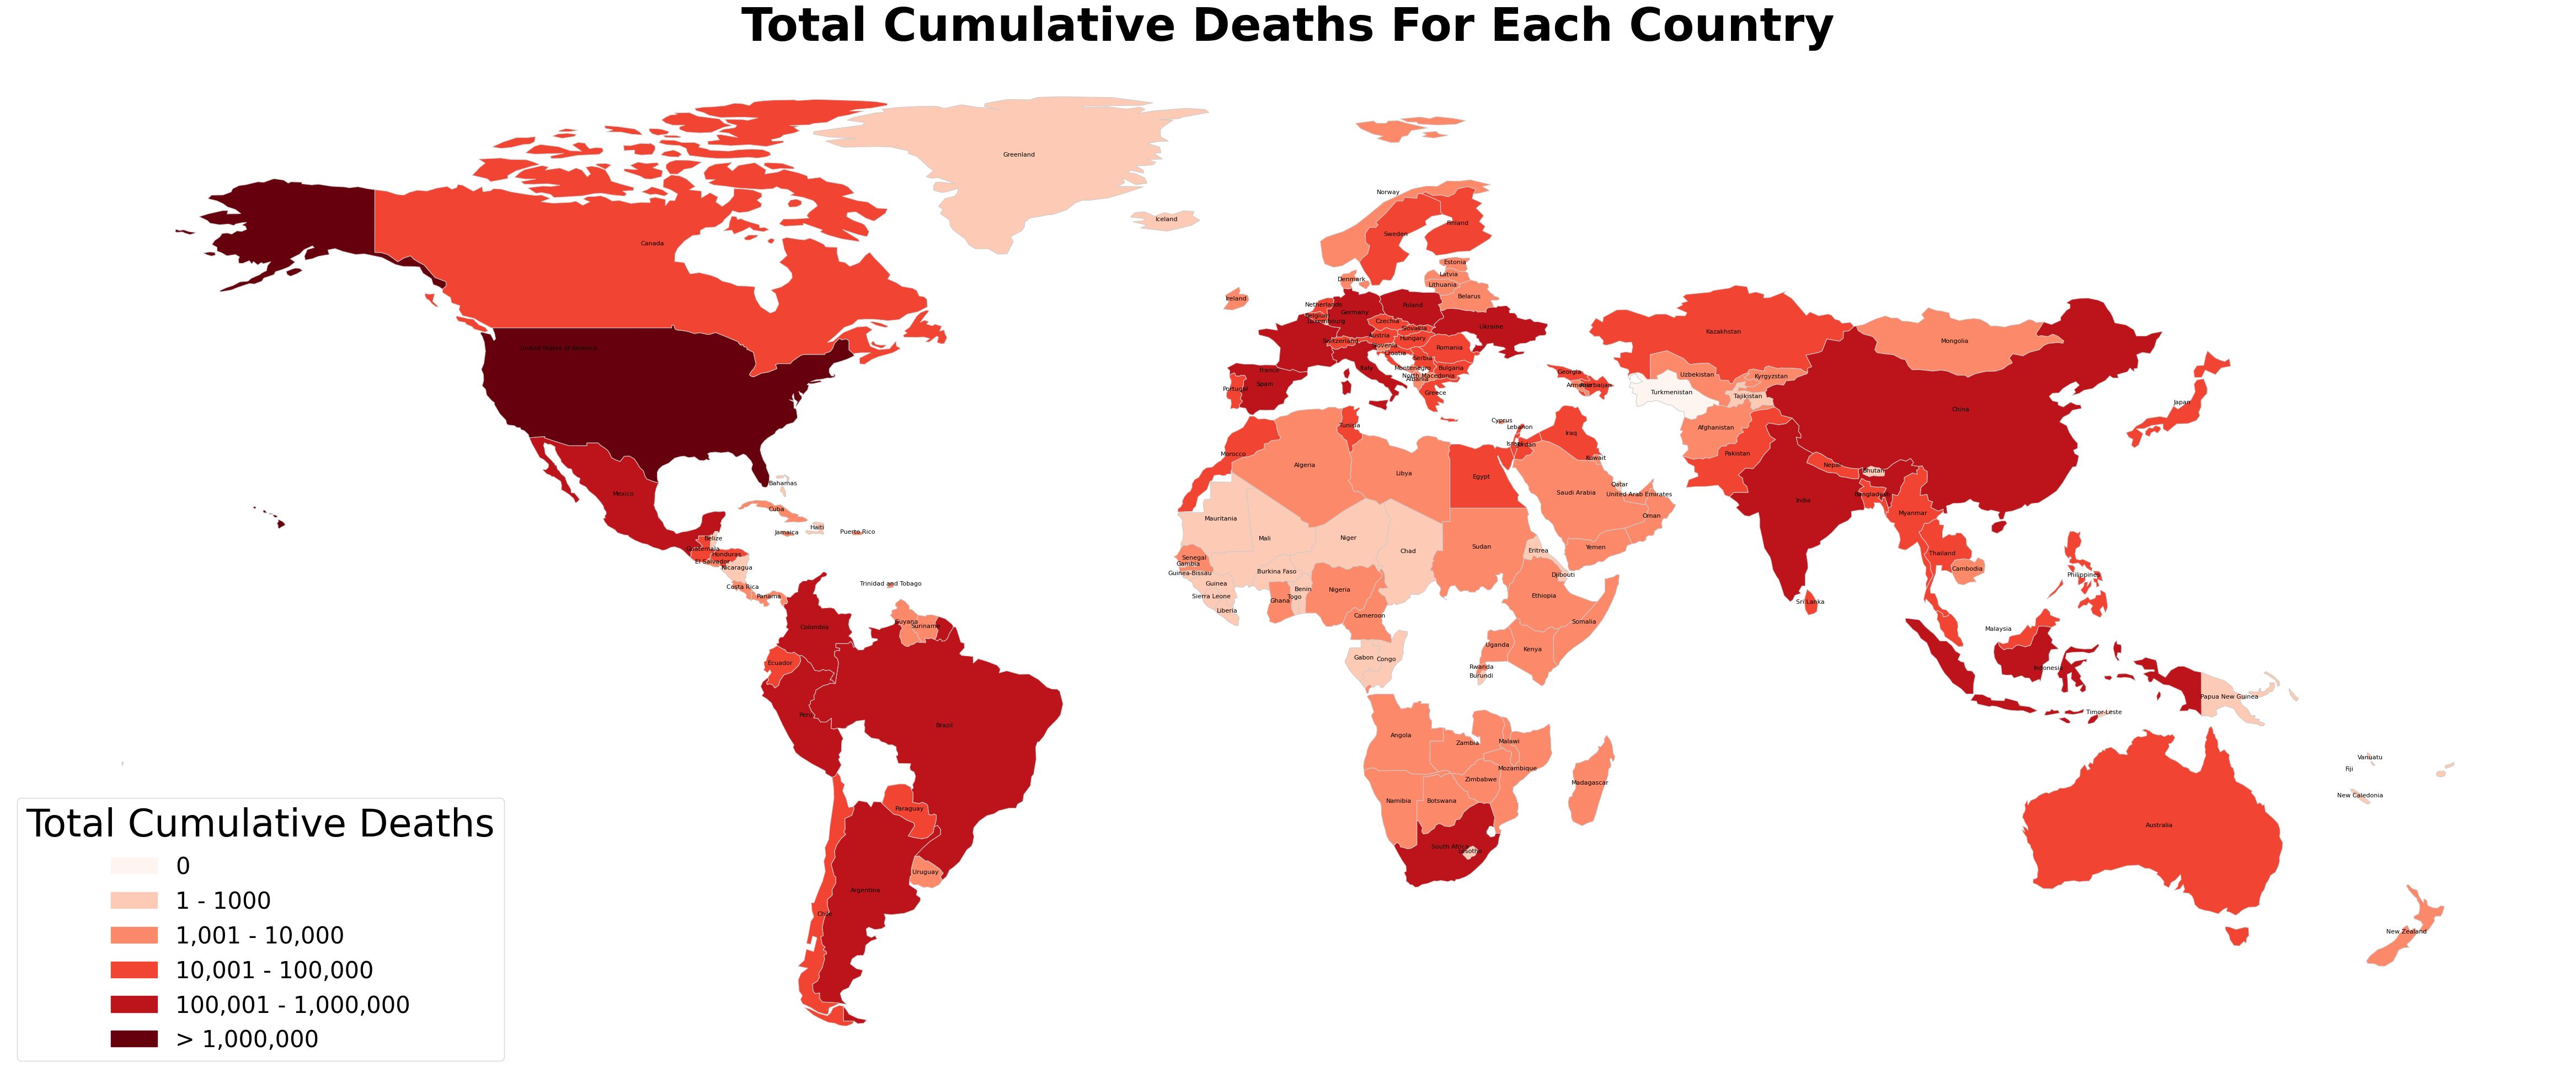

In [50]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# read in the shapefile of country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# join the data with the country boundaries
merged = world.merge(df, left_on='name', right_on='Name')

# create bins for the data
bins = [-np.inf, 0 , 1000, 10000, 100000, 1000000, np.inf]
labels = ['0', '1 - 1000', '1,001 - 10,000', '10,001 - 100,000', '100,001 - 1,000,000', '> 1,000,000']
merged['bin'] = pd.cut(merged['Deaths - cumulative total'], bins=bins, labels=labels)

# plot the data on a map
fig, ax = plt.subplots(figsize=(60, 60))
merged.plot(column='bin', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Total Cumulative Deaths For Each Country', fontdict={'fontsize': '60', 'fontweight' : 'bold'})

# add country labels to the map
merged.apply(lambda x: ax.annotate(text=x.Name, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8),axis=1)

# add a legend with color blocks corresponding to different bins
cmap = plt.cm.get_cmap('Reds', len(labels))
handles = [plt.Rectangle((0,0),1,1, color=cmap(i)) for i in range(len(labels))]
ax.legend(handles, labels, loc='lower left', fontsize=30, title='Total Cumulative Deaths', title_fontsize=50)

plt.show()

## Scatterplots

In [51]:
merged[['Name', 'geometry']] = merged[['name', 'geometry']].to_crs(epsg=3395)
merged['area_km^2'] = merged['geometry'].area / 10**6
merged['pop_density'] = merged['pop_est'] / merged['area_km^2']

merged.sort_values(by='pop_density', ascending=False).head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,...,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,bin,area_km^2,pop_density
81,1.630462e+08,Asia,Bangladesh,BGD,302571,"POLYGON ((10316280.110 2500448.822, 10314002.0...",Bangladesh,South-East Asia,2045892,1242.273,...,0.016,0,29477,17.899,0,0.000,0,"10,001 - 100,000",1.597920e+05,1020.364982
140,1.262695e+07,Africa,Rwanda,RWA,10354,"POLYGON ((3386239.263 -125472.421, 3430436.443...",Rwanda,Africa,133194,1028.349,...,0.000,0,1468,11.334,0,0.000,0,"1,001 - 10,000",2.339507e+04,539.726974
64,6.855713e+06,Asia,Lebanon,LBN,51991,"POLYGON ((3987586.690 3908742.154, 3957719.221...",Lebanon,Eastern Mediterranean,1239904,18165.907,...,0.000,0,10947,160.385,0,0.000,0,"10,001 - 100,000",1.462833e+04,468.660144
62,1.153058e+07,Africa,Burundi,BDI,3012,"POLYGON ((3391868.555 -266990.291, 3398323.566...",Burundi,Africa,54366,457.211,...,0.000,0,15,0.126,0,0.000,0,1 - 1000,2.633163e+04,437.898429
80,1.366418e+09,Asia,India,IND,2868929,"POLYGON ((10834404.758 3261766.224, 10842803.5...",India,South-East Asia,45001052,3260.935,...,0.099,0,533291,38.644,1254,0.091,0,"100,001 - 1,000,000",3.741576e+06,365.198472
13,1.126308e+07,North America,Haiti,HTI,14332,"POLYGON ((-7982983.556 2224827.825, -7973244.4...",Haiti,Americas,34403,301.714,...,0.000,0,860,7.542,0,0.000,0,1 - 1000,3.186215e+04,353.493968
122,1.081166e+08,Asia,Philippines,PHL,376795,"MULTIPOLYGON (((13451167.786 1416600.383, 1339...",Philippines,Western Pacific,4117183,3757.202,...,0.000,0,66714,60.881,0,0.000,0,"10,001 - 100,000",3.061892e+05,353.103985
115,2.180300e+07,Asia,Sri Lanka,LKA,84008,"POLYGON ((9104593.951 834289.042, 9087825.139 ...",Sri Lanka,South-East Asia,672597,3141.032,...,0.014,0,16882,78.839,0,0.000,0,"10,001 - 100,000",6.656995e+04,327.520145
36,3.193694e+06,North America,Puerto Rico,PRI,104988,"POLYGON ((-7378526.852 2084327.765, -7321627.9...",Puerto Rico,Americas,1252713,43788.094,...,0.000,0,5938,207.560,0,0.000,0,"1,001 - 10,000",1.021931e+04,312.515496
29,6.453553e+06,North America,El Salvador,SLV,27022,"POLYGON ((-9946766.748 1612284.229, -9913948.1...",El Salvador,Americas,201808,3111.342,...,0.000,0,4230,65.215,0,0.000,0,"1,001 - 10,000",2.213323e+04,291.577512


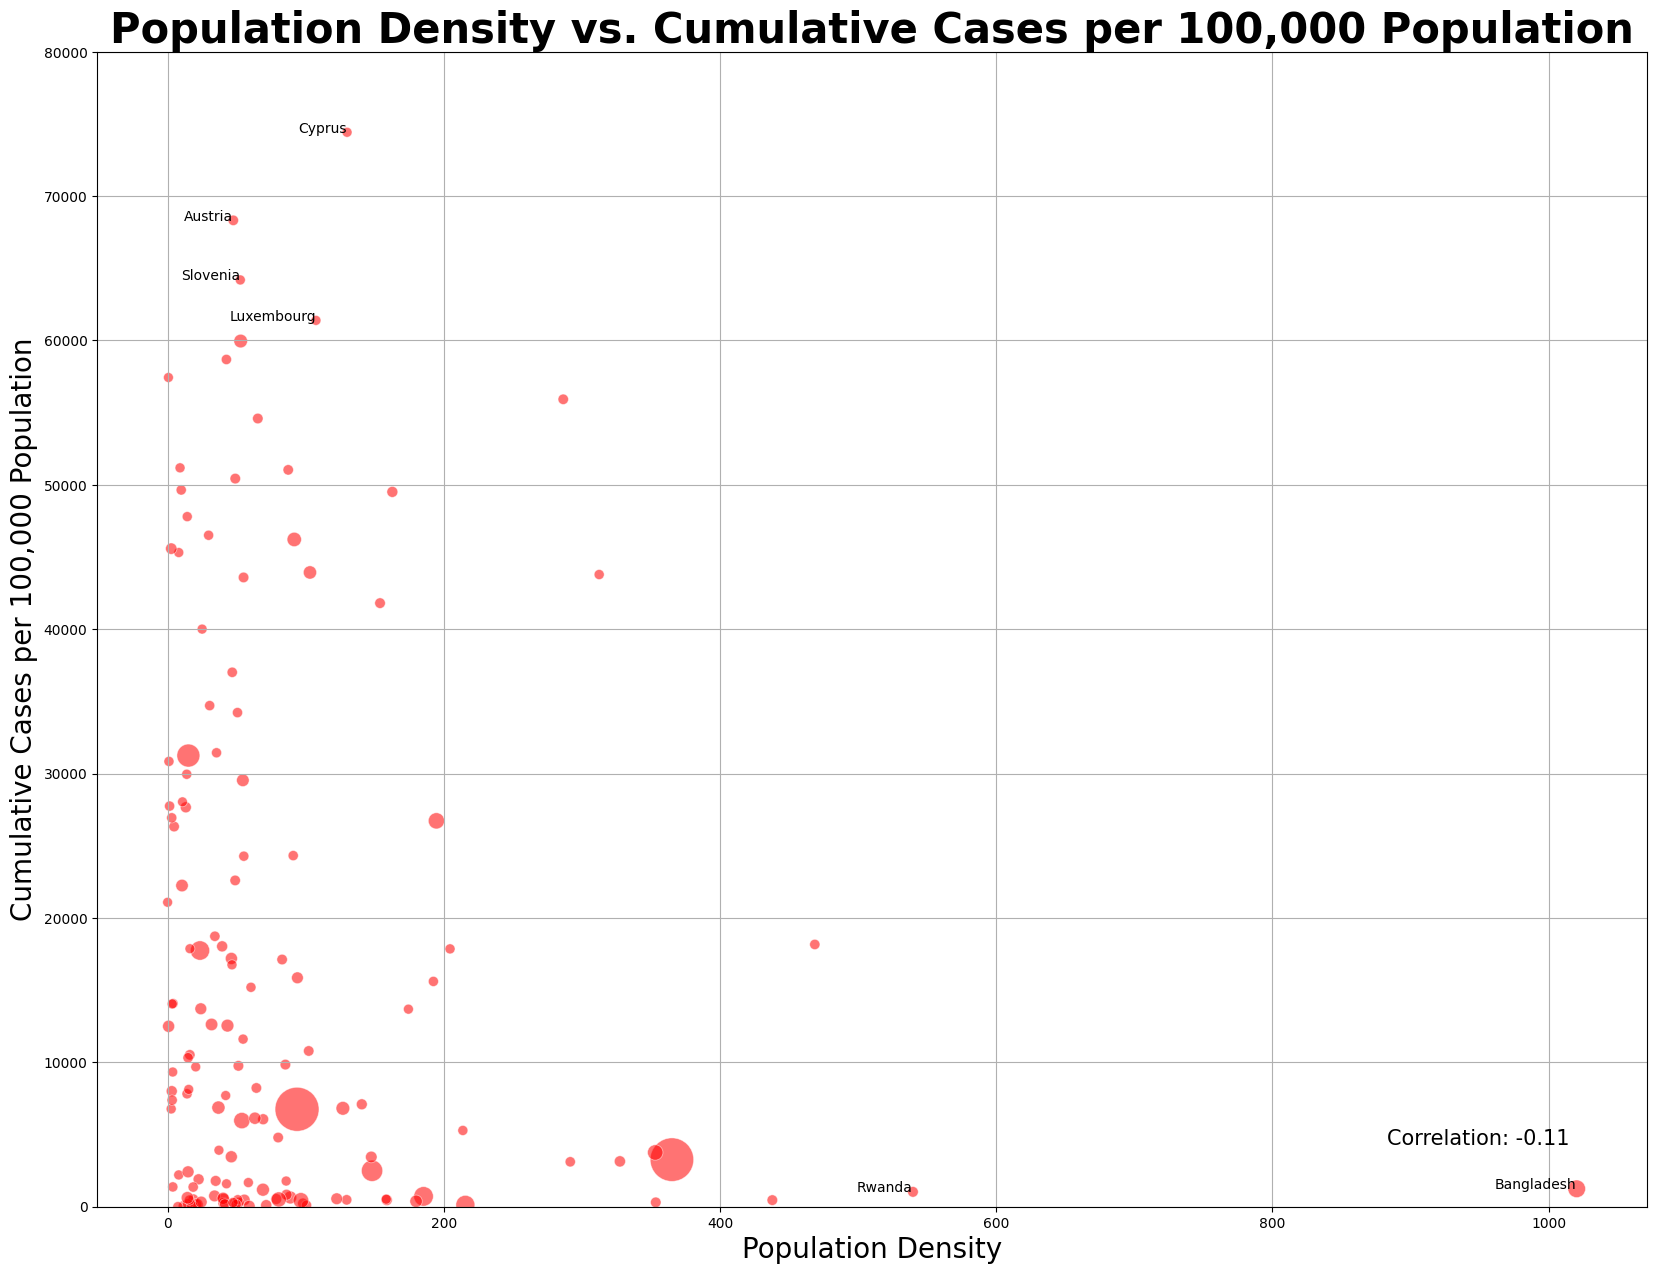

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 15))

# Use a log scale for the size of the points
sizes = merged['pop_est']

sns.scatterplot(data=merged, x='pop_density', y='Cases - cumulative total per 100000 population', size=sizes, sizes=(50, 1000), legend=False, color='red', alpha=0.55)

# Add a title and labels to your axes
plt.title('Population Density vs. Cumulative Cases per 100,000 Population', fontsize=30, fontweight='bold')
plt.xlabel('Population Density', fontsize=20)
plt.ylabel('Cumulative Cases per 100,000 Population', fontsize=20)

# Add a grid
plt.grid(True)

# Adjust the y-axis limits
plt.ylim(0, 80000)

# Add correlation matrix as text annotation
corr = merged[['pop_density', 'Cases - cumulative total per 100000 population']].corr().iloc[0,1]
plt.text(0.95, 0.05, f'Correlation: {corr:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=15)

for i, row in merged.iterrows():
    if row['Cases - cumulative total per 100000 population'] > 60000 or row['pop_density'] > 500:
        plt.text(row['pop_density'], row['Cases - cumulative total per 100000 population'], row['name'], ha='right')

plt.show()

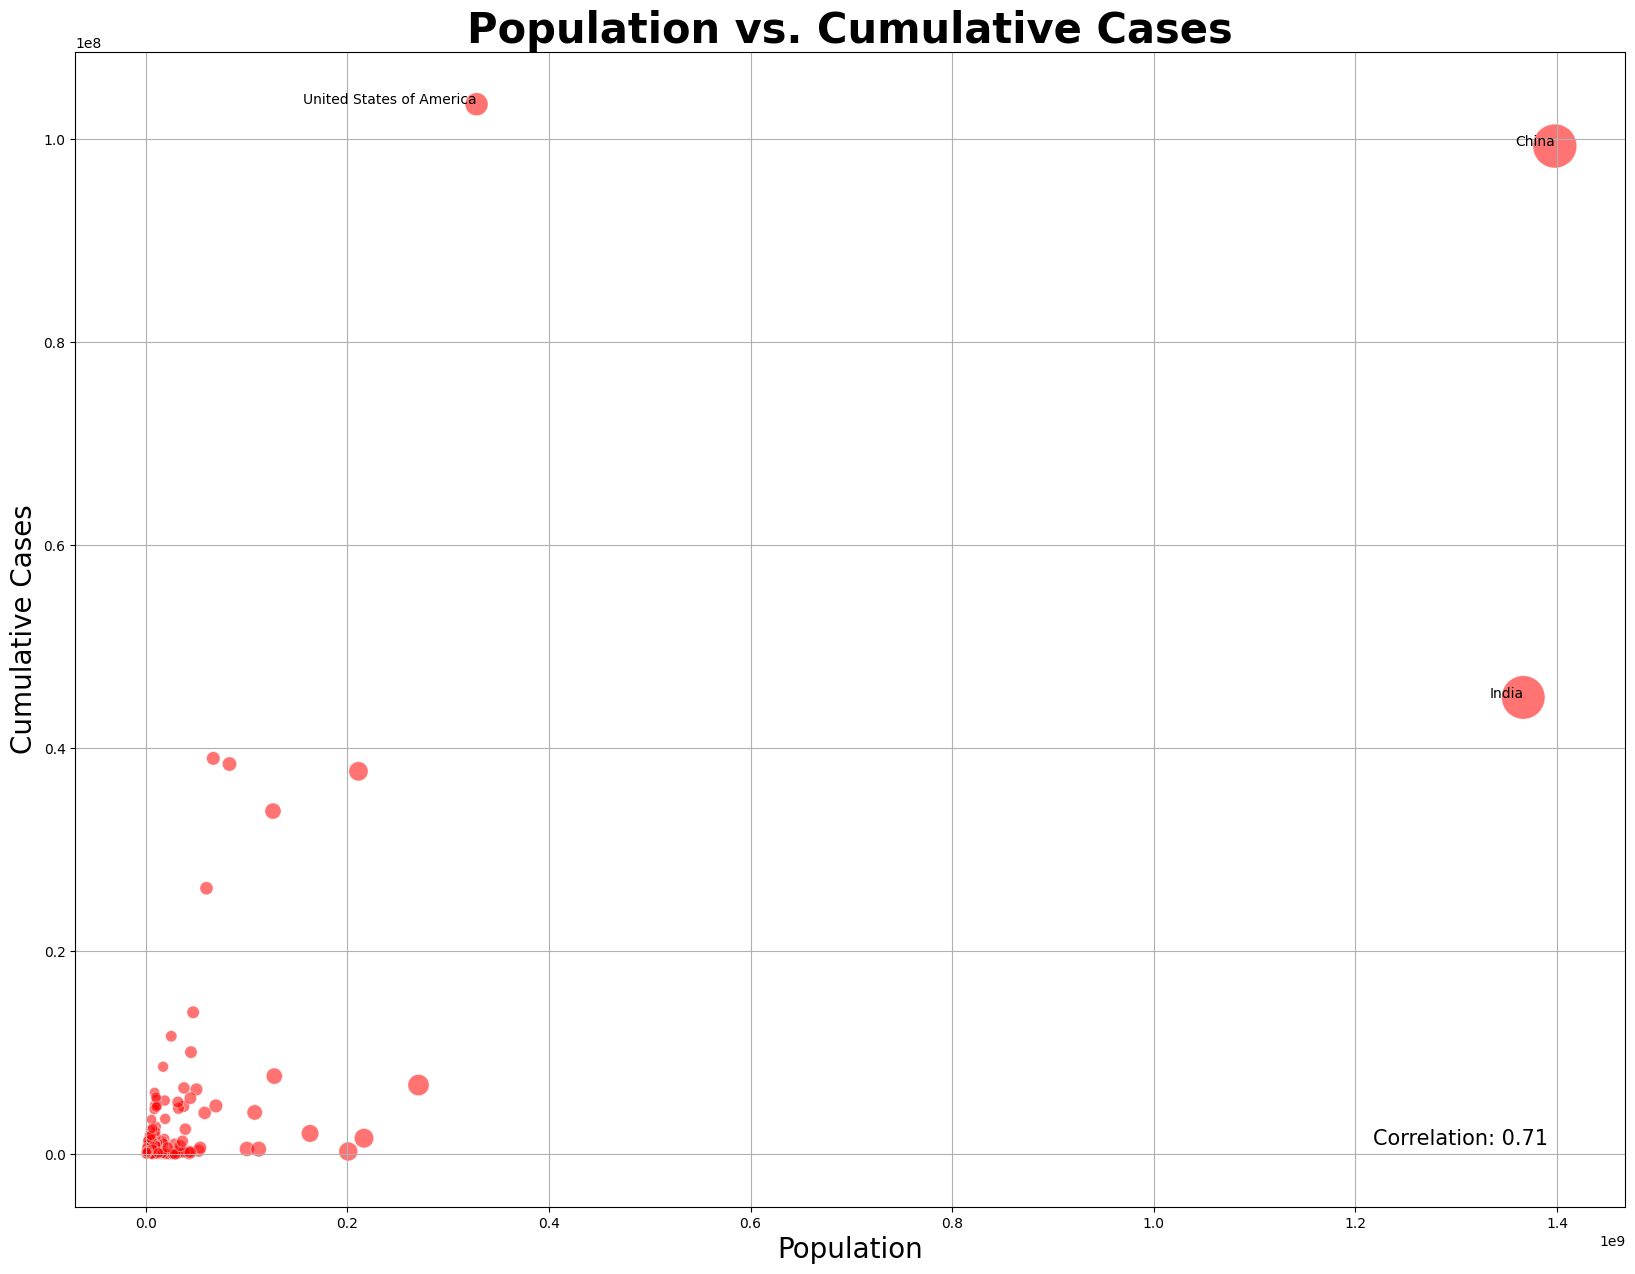

In [53]:
plt.figure(figsize=(20, 15))
sns.scatterplot(data=merged, x='pop_est', y='Cases - cumulative total', size='pop_est',sizes=(50, 1000), legend=False, color='red', alpha=0.55)
plt.title('Population vs. Cumulative Cases', fontsize=30, fontweight='bold')
plt.xlabel('Population', fontsize=20)
plt.ylabel('Cumulative Cases', fontsize=20)
plt.grid(True)

# add correlation matrix as text annotation
corr = merged[['pop_est', 'Cases - cumulative total']].corr().iloc[0,1]
plt.text(0.95, 0.05, f'Correlation: {corr:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=15)

for i, row in merged.iterrows():
    if row['pop_est'] > 1e9 or row['Cases - cumulative total'] > 0.4e8:
        plt.text(row['pop_est'], row['Cases - cumulative total'], row['name'], ha='right')

plt.show()


# Animatation

In [54]:
path = './WHO COVID-19 Data/WHO-COVID-19-global-data.csv'
df = pd.read_csv(path)

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# read in the shapefile of country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# join the data with the country boundaries
merged = world.merge(df, left_on='name', right_on='Country')
merged

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2020-01-03,FJ,Fiji,WPRO,0,0,0,0
1,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2020-01-04,FJ,Fiji,WPRO,0,0,0,0
2,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2020-01-05,FJ,Fiji,WPRO,0,0,0,0
3,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2020-01-06,FJ,Fiji,WPRO,0,0,0,0
4,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2020-01-07,FJ,Fiji,WPRO,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201835,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",2023-10-21,TT,Trinidad and Tobago,AMRO,0,191496,0,4390
201836,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",2023-10-22,TT,Trinidad and Tobago,AMRO,0,191496,0,4390
201837,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",2023-10-23,TT,Trinidad and Tobago,AMRO,0,191496,0,4390
201838,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",2023-10-24,TT,Trinidad and Tobago,AMRO,0,191496,0,4390


## Cumulative Cases by Country - Slider

In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ipywidgets import interactive, SelectionSlider, Output
from IPython.display import display

# Assuming 'merged' is your GeoDataFrame
first_date_gdf = merged[merged['Date_reported'] == merged['Date_reported'].min()].copy()

# Create bins for the data
bins = [-np.inf, 0 , 5000, 50000, 500000, 5000000, 50000000, np.inf]
labels = ['0', '1 - 5,000', '5,001 - 50,000', '50,001 - 500,000', '500,001 - 5,000,000', '5,000,001 - 50,000,000', '> 50,000,000']
first_date_gdf['bin'] = pd.cut(first_date_gdf['Cumulative_cases'], bins=bins, labels=labels)

output = Output()

@output.capture(clear_output=True)
def update_map(date):
    fig, ax = plt.subplots(figsize=(60, 60))
    date_gdf = merged[merged['Date_reported'] == date].copy()
    date_gdf['bin'] = pd.cut(date_gdf['Cumulative_cases'], bins=bins, labels=labels)
    ax.clear()
    date_gdf.plot(column='bin', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
    date_gdf.apply(lambda x: ax.annotate(text=x.Country, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8),axis=1)
    ax.axis('off')
    ax.set_title('Cumulative COVID-19 Cases by Country - ' + str(date), fontdict={'fontsize': '60', 'fontweight' : 'bold'})
    
    # Re-create the legend
    cmap = plt.cm.get_cmap('Reds', len(labels))
    handles = [plt.Rectangle((0,0),1,1, color=cmap(i)) for i in range(len(labels))]
    ax.legend(handles, labels, loc='lower left', fontsize=30, title='Total Cumulative Cases', title_fontsize=50)
    plt.show()

# Step 7
dates = list(merged['Date_reported'].unique())
date_slider = SelectionSlider(
    options=dates,
    description='Select Date',
    disabled=False,
    continuous_update=True
)

interactive_plot = interactive(update_map, date=date_slider)
display(interactive_plot, output)


interactive(children=(SelectionSlider(description='Select Date', options=('2020-01-03', '2020-01-04', '2020-01…

Output()

## Cumulative Deaths by Country - Gif

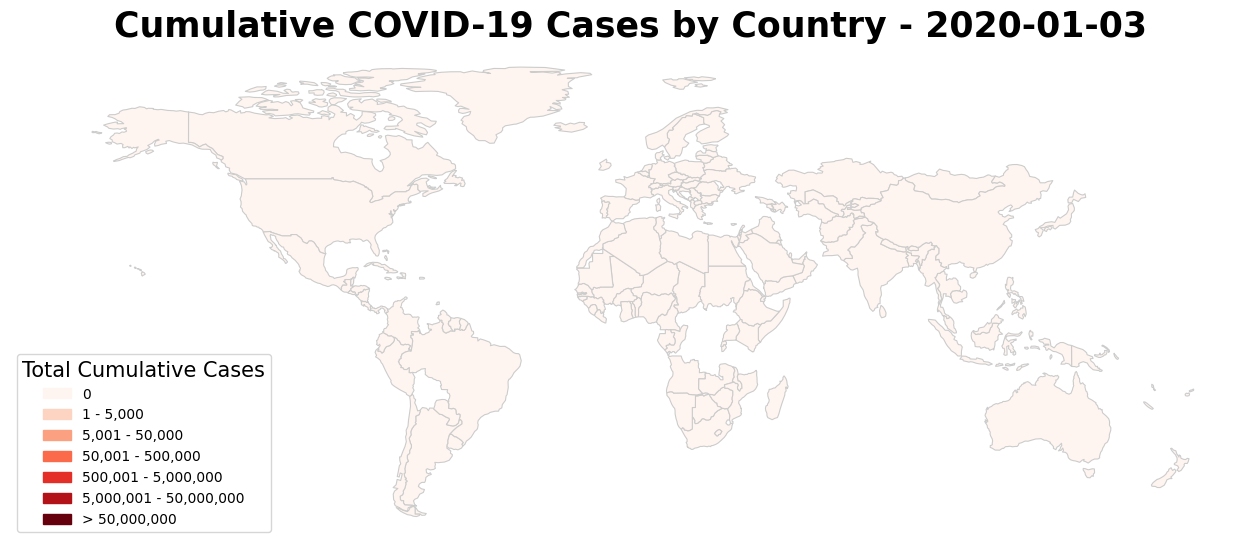

In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.animation as animation
from PIL import Image

# Assuming 'merged' is your GeoDataFrame
first_date_gdf = merged[merged['Date_reported'] == merged['Date_reported'].min()].copy()

# Create bins for the data
bins = [-np.inf, 0, 5000, 50000, 500000, 5000000, 50000000, np.inf]
labels = ['0', '1 - 5,000', '5,001 - 50,000', '50,001 - 500,000', '500,001 - 5,000,000', '5,000,001 - 50,000,000', '> 50,000,000']
first_date_gdf['bin'] = pd.cut(first_date_gdf['Cumulative_cases'], bins=bins, labels=labels)

# Define a function to update the map
def update_map(date, ax):
    date_gdf = merged[merged['Date_reported'] == date].copy()
    date_gdf['bin'] = pd.cut(date_gdf['Cumulative_cases'], bins=bins, labels=labels)
    ax.clear()
    date_gdf.plot(column='bin', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    ax.set_title('Cumulative COVID-19 Cases by Country - ' + str(date), fontdict={'fontsize': '25', 'fontweight': 'bold'})
    
    # Re-create the legend
    cmap = plt.cm.get_cmap('Reds', len(labels))
    handles = [plt.Rectangle((0,0),1,1, color=cmap(i)) for i in range(len(labels))]
    ax.legend(handles, labels, loc='lower left', fontsize=10, title='Total Cumulative Cases', title_fontsize=15)

# Get the list of unique dates
dates = list(merged['Date_reported'].unique())

# Optionally, limit the number of frames for testing
# dates = dates[::10]  # Every 10th date

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 10))

# Create an animation
ani = animation.FuncAnimation(fig, update_map, frames=dates, fargs=(ax,), repeat=False)

# Save the animation as a GIF


# ani.save('cum_map.gif', writer='pillow', fps=300)  # Adjust fps for speed of animation


# New Cases by Country - Gif

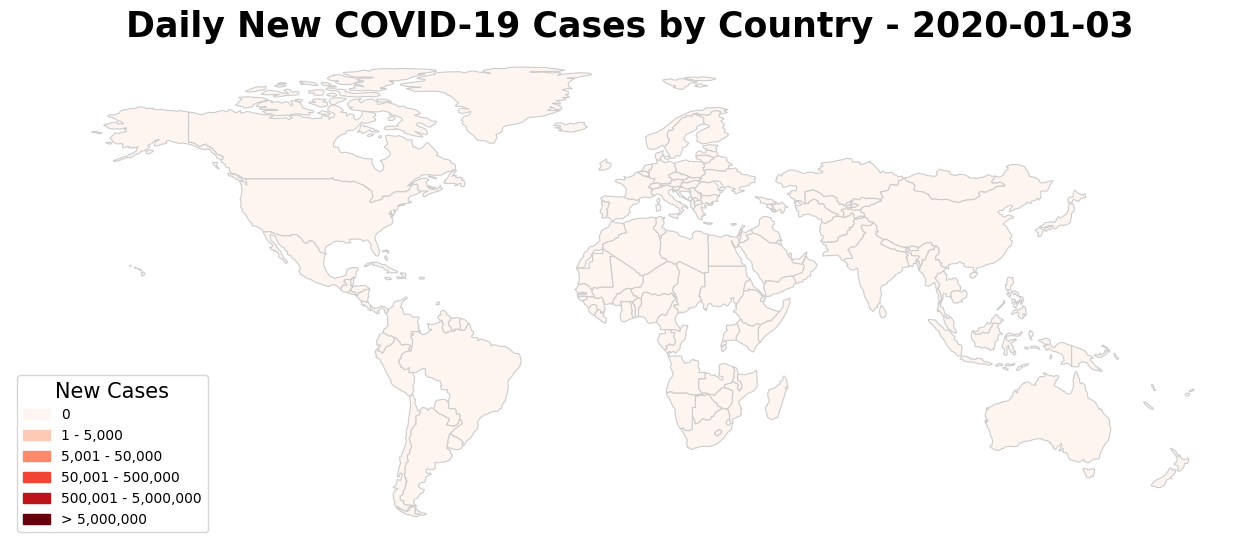

In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.animation as animation
from PIL import Image

# Assuming 'merged' is your GeoDataFrame
first_date_gdf = merged[merged['Date_reported'] == merged['Date_reported'].min()].copy()

# Create bins for the data
bins = [-np.inf, 0, 5000, 50000, 500000, 5000000, np.inf]
labels = ['0', '1 - 5,000', '5,001 - 50,000', '50,001 - 500,000', '500,001 - 5,000,000', '> 5,000,000']
first_date_gdf['bin'] = pd.cut(first_date_gdf['New_cases'], bins=bins, labels=labels)

# Define a function to update the map
def update_map(date, ax):
    date_gdf = merged[merged['Date_reported'] == date].copy()
    date_gdf['bin'] = pd.cut(date_gdf['New_cases'], bins=bins, labels=labels)
    ax.clear()
    date_gdf.plot(column='bin', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    ax.set_title('Daily New COVID-19 Cases by Country - ' + str(date), fontdict={'fontsize': '25', 'fontweight': 'bold'})
    
    # Re-create the legend
    cmap = plt.cm.get_cmap('Reds', len(labels))
    handles = [plt.Rectangle((0,0),1,1, color=cmap(i)) for i in range(len(labels))]
    ax.legend(handles, labels, loc='lower left', fontsize=10, title='New Cases', title_fontsize=15)

# Get the list of unique dates
dates = list(merged['Date_reported'].unique())

# Optionally, limit the number of frames for testing
# dates = dates[::10]  # Every 10th date

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 10))

# Create an animation
ani = animation.FuncAnimation(fig, update_map, frames=dates, fargs=(ax,), repeat=False)

# Save the animation as a GIF


# ani.save('daily_map.gif', writer='pillow', fps=300)  # Adjust fps for speed of animation

## Cumulative Line Gif

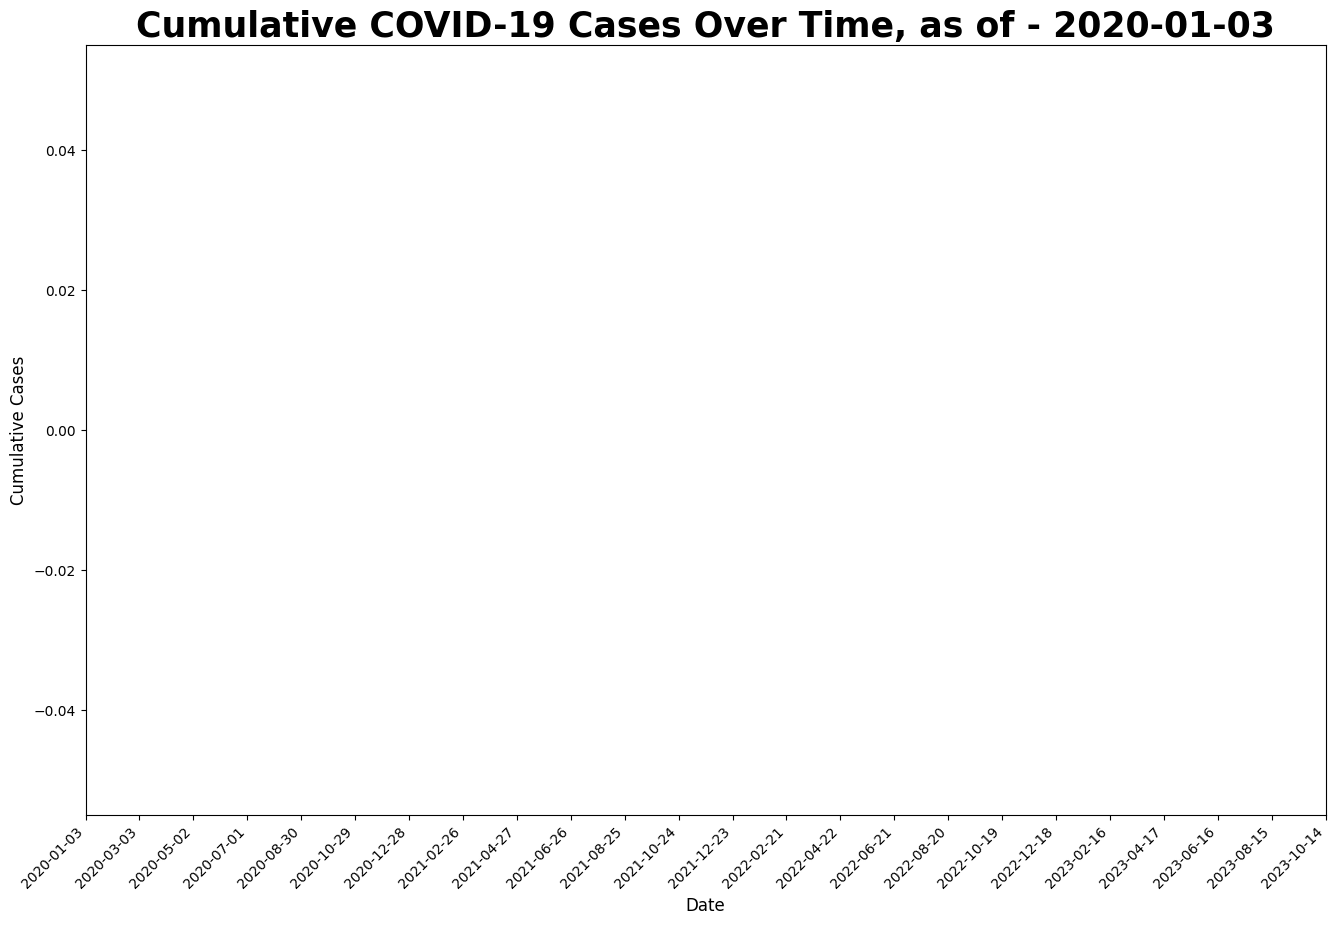

In [58]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'merged' is your DataFrame
scatter_df = merged.groupby('Date_reported')['Cumulative_cases'].sum().reset_index()

# Get the list of unique dates
dates = list(merged['Date_reported'].unique())

# Determine the limits for the x and y axes

# Define a function to update the scatter plot
def update_scatter(frame, ax):
    ax.clear()
    sns.lineplot(data=scatter_df.iloc[:frame + 1], x='Date_reported', y='Cumulative_cases', ax=ax, color='red')
    ax.set_title('Cumulative COVID-19 Cases Over Time, as of - ' + str(scatter_df['Date_reported'].iloc[frame]), fontsize=25, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative Cases', fontsize=12)
    ax.set_xticks(range(0, len(scatter_df), 60))
    ax.set_xticklabels(scatter_df['Date_reported'][::60], rotation=45, ha='right')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 10))

# Create an animation
ani_scatter = animation.FuncAnimation(fig, update_scatter, frames=len(dates), fargs=(ax,), repeat=False)

# Save the animation as a GIF
# ani_scatter.save('cum_line.gif', writer='pillow', fps=300)  # Adjust fps to match the speed and duration of map animation


## New Cases Line - Gif

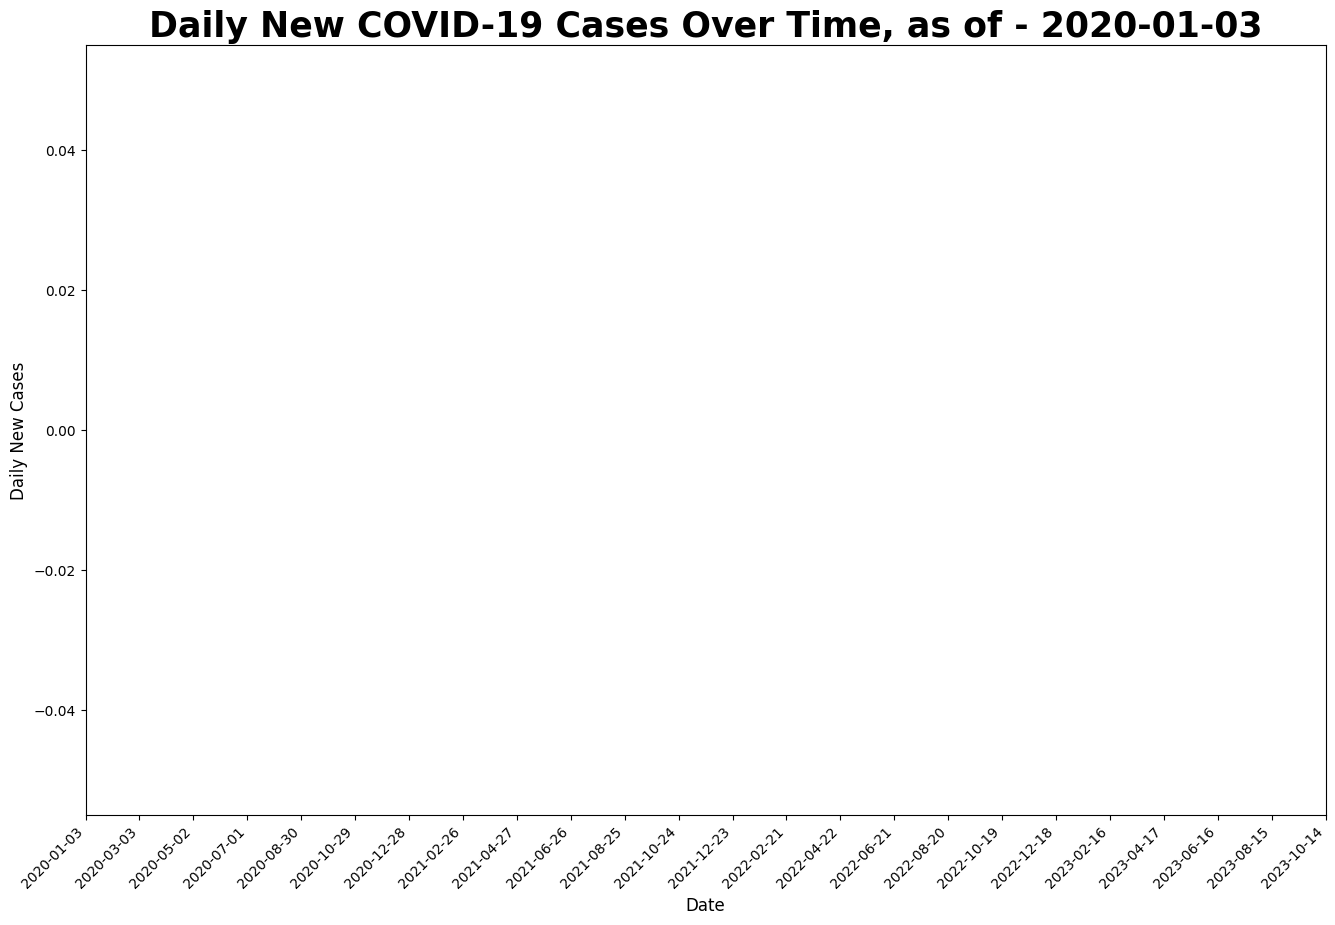

In [59]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'merged' is your DataFrame
scatter_df = merged.groupby('Date_reported')['New_cases'].sum().reset_index()

# Get the list of unique dates
dates = list(merged['Date_reported'].unique())

# Define a function to update the scatter plot
def update_scatter(frame, ax):
    ax.clear()
    sns.lineplot(data=scatter_df.iloc[:frame + 1], x='Date_reported', y='New_cases', ax=ax, color='red')
    ax.set_title('Daily New COVID-19 Cases Over Time, as of - ' + str(scatter_df['Date_reported'].iloc[frame]), fontsize=25, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Daily New Cases', fontsize=12)
    ax.set_xticks(range(0, len(scatter_df), 60))
    ax.set_xticklabels(scatter_df['Date_reported'][::60], rotation=45, ha='right')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 10))

# Create an animation
ani_scatter = animation.FuncAnimation(fig, update_scatter, frames=len(dates), fargs=(ax,), repeat=False)

# Save the animation as a GIF
# ani_scatter.save('daily_line.gif', writer='pillow', fps=300)  # Adjust fps to match the speed and duration of map animation

# Apendix

In [60]:
path = './WHO COVID-19 Data/WHO-COVID-19-global-table-data.csv'
df = pd.read_csv(path)
df.reset_index(inplace=True)
df = df.shift(1, axis=1)
df.drop(df.columns[0], axis=1, inplace=True)
df

df[['Name', 'Cases - cumulative total']].sort_values(by='Cases - cumulative total', ascending=False).head(11)

,Name,Cases - cumulative total
0,Global,771549718
1,United States of America,103436829
2,China,99316932
3,India,45001052
4,France,38997490
5,Germany,38437756
6,Brazil,37721749
7,Republic of Korea,34571873
8,Japan,33803572
9,Italy,26202253


In [68]:
df[['Name', 'Cases - cumulative total per 100000 population']].sort_values(by='Cases - cumulative total per 100000 population', ascending=False).head(10).reset_index(drop=True)

,Name,Cases - cumulative total per 100000 population
0,Cyprus,74420.076
1,San Marino,72770.935
2,Brunei Darussalam,71339.196
3,Faroe Islands,70926.021
4,Austria,68320.900
5,Republic of Korea,67432.071
6,Slovenia,64192.425
7,Andorra,62143.273
8,Jersey,61589.484
9,Luxembourg,61391.645


In [64]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# read in the shapefile of country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# join the data with the country boundaries
merged = world.merge(df, left_on='name', right_on='Name')

merged[['Name', 'geometry']] = merged[['name', 'geometry']].to_crs(epsg=3395)
merged['area_km^2'] = merged['geometry'].area / 10**6
merged['pop_density'] = merged['pop_est'] / merged['area_km^2']

merged[['Name', 'pop_density']].sort_values(by='pop_density', ascending=False).head(11)

,Name,pop_density
81,Bangladesh,1020.364982
140,Rwanda,539.726974
64,Lebanon,468.660144
62,Burundi,437.898429
80,India,365.198472
13,Haiti,353.493968
122,Philippines,353.103985
115,Sri Lanka,327.520145
36,Puerto Rico,312.515496
29,El Salvador,291.577512
